<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Other-Clustering-Methods" data-toc-modified-id="Other-Clustering-Methods-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Other Clustering Methods</a></span><ul class="toc-item"><li><span><a href="#Recapitulando---Blobs-&amp;-K-Means" data-toc-modified-id="Recapitulando---Blobs-&amp;-K-Means-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Recapitulando - Blobs &amp; K-Means</a></span></li><li><span><a href="#Blobs-esticados,-e-KMeans?" data-toc-modified-id="Blobs-esticados,-e-KMeans?-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Blobs esticados, e KMeans?</a></span><ul class="toc-item"><li><span><a href="#Solução---GMM!" data-toc-modified-id="Solução---GMM!-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Solução - GMM!</a></span></li></ul></li><li><span><a href="#Algoritmos-bottom-up" data-toc-modified-id="Algoritmos-bottom-up-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Algoritmos bottom-up</a></span><ul class="toc-item"><li><span><a href="#Clusterização-hierarquica" data-toc-modified-id="Clusterização-hierarquica-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Clusterização hierarquica</a></span></li><li><span><a href="#DBSCAN" data-toc-modified-id="DBSCAN-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>DBSCAN</a></span></li></ul></li></ul></li></ul></div>

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, make_classification, make_circles
from yellowbrick.cluster import KElbowVisualizer

# Other Clustering Methods

## Recapitulando - Blobs & K-Means

In [ ]:
X, y_true = make_blobs(n_samples=300, centers=5,
                       cluster_std=0.5, random_state=0)
tb_blob = pd.DataFrame(X, columns = ['X1', 'X2'])
sns.scatterplot(data = tb_blob, x = 'X1', y = 'X2');

In [ ]:
km_fit = KMeans(n_clusters = 5).fit(tb_blob[['X1', 'X2']])

tb_blob['clu_kmeans'] = [str(label) for label in km_fit.labels_]
tb_centroid = pd.DataFrame(km_fit.cluster_centers_, columns = ['X1', 'X2'])

sns.scatterplot(data = tb_blob, x = 'X1', y = 'X2', hue = 'clu_kmeans');
sns.scatterplot(data = tb_centroid, x = 'X1', y = 'X2', color = 'black');

## Blobs esticados, e KMeans?

In [ ]:
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))
tb_sblob = pd.DataFrame(X_stretched, columns = ['X1', 'X2'])

In [ ]:
sns.scatterplot(data = tb_sblob, x = 'X1', y = 'X2')

In [ ]:
km_fit = KMeans(n_clusters = 4).fit(tb_sblob[['X1', 'X2']])

tb_sblob['clu_kmeans'] = [str(label) for label in km_fit.labels_]
tb_centroid = pd.DataFrame(km_fit.cluster_centers_, columns = ['X1', 'X2'])

sns.scatterplot(data = tb_sblob, x = 'X1', y = 'X2', hue = 'clu_kmeans');
sns.scatterplot(data = tb_centroid, x = 'X1', y = 'X2', color = 'black');

### Solução - GMM!
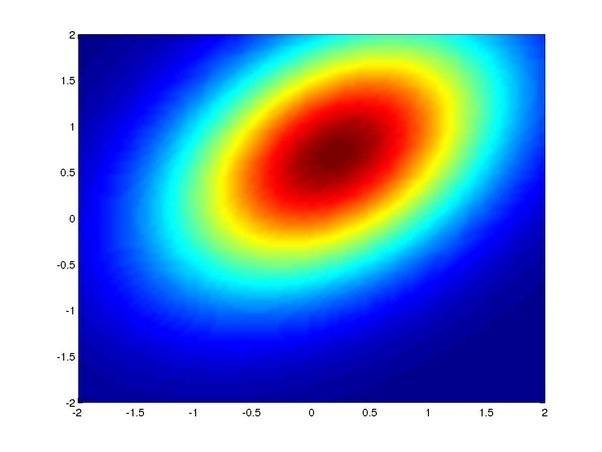

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4)
gmm.fit(tb_sblob[['X1', 'X2']])
tb_sblob['clu_gmm'] = [str(x) for x in gmm.predict(tb_sblob[['X1', 'X2']])]

sns.scatterplot(data = tb_sblob, x = 'X1', y = 'X2', hue = 'clu_gmm');

In [ ]:
gmm.predict_proba(tb_sblob[['X1', 'X2']])

In [ ]:
tb_sblob_gmm = pd.concat([
    pd.DataFrame(gmm.predict_proba(tb_sblob[['X1', 'X2']]),
                 columns=['c1', 'c2', 'c3', 'c4']), tb_sblob
],
                         axis=1)

In [ ]:
fig, ax = plt.subplots(1, 2)
sns.scatterplot(data = tb_sblob_gmm, x = 'X1', y = 'c2', ax = ax[0]);
sns.scatterplot(data = tb_sblob_gmm, x = 'X2', y = 'c2', ax = ax[1]);

In [ ]:
sns.scatterplot(data = tb_sblob_gmm, x = 'X1', y = 'X2', size = 'c4', hue = 'c4');

In [ ]:
tb_sblob_gmm['incerteza'] = 1 - np.max(gmm.predict_proba(tb_sblob[['X1', 'X2']]), axis=1)

In [ ]:
fig, ax = plt.subplots(figsize = (8,8))
sns.scatterplot(data = tb_sblob_gmm, x = 'X1', y = 'X2', hue = 'clu_gmm', size = 'incerteza', sizes = (15, 300));

## Algoritmos bottom-up

### Clusterização hierarquica

- <b>Maximum or complete linkage</b> minimizes the maximum distance between observations of pairs of clusters: 
    - Compute all pairwise distances between observations in cluster A and in cluster B, and record the largest of these distances.
    

- <b>Average linkage</b> minimizes the average of the distances between all observations of pairs of clusters.
    - Compute all pairwise distance between the observations in cluster A and cluster B and record the average of these distances.

- <b>Single linkage</b> minimizes the distance between the closest observations of pairs of clusters.
    - Compute all pairwise distance between the observations in clusterA and cluster B and record the smallest of these distances.
- <b> Ward </b> minimizes the error sum of squares (also known as variance)

In [ ]:
tb_mall = pd.read_csv('data/Mall_Customers.csv')
tb_mall.columns = ['cid', 'genre', 'age', 'income', 'spend']

In [ ]:
tb_mall.head()

In [ ]:
X = tb_mall[['age', 'income', 'spend']]
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)
tb_mall_std = pd.DataFrame(X_std, columns = ['age', 'income', 'spend'])

In [ ]:
sns.pairplot(tb_mall_std)

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(tb_mall_std)
visualizer.show();

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
dendrogram_ = dendrogram(linkage(tb_mall_std, method = 'complete'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hierarchical = AgglomerativeClustering(5, affinity='euclidean', linkage='complete')
hierarchical.fit(tb_mall_std)
tb_mall['clu_ward'] = [str(x) for x in hierarchical.labels_]

In [ ]:
sns.pairplot(tb_mall, vars = ['age', 'income', 'spend'], hue = 'clu_ward')

### DBSCAN

In [ ]:
X, y = make_moons(200, noise=.05, random_state=0)

In [ ]:
tb_moon = pd.DataFrame(X, columns = ['X1', 'X2'])
sns.scatterplot(data=tb_moon, x = 'X1', y = 'X2')

In [ ]:
db = DBSCAN(eps=0.3, min_samples=10)
tb_moon['clu_dbscan'] = db.fit_predict(X)

In [ ]:
sns.scatterplot(data=tb_moon, x = 'X1', y = 'X2', hue = 'clu_dbscan')